<a href="https://www.kaggle.com/code/bineetbairagi/food-predictor-zomato-ds?scriptVersionId=260194137" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import random
from collections import defaultdict

def create_kolkata_zomato_data():
    """
    Generates a synthetic dataset of restaurants in Kolkata.

    The data is based on popular and authentic dishes and restaurants
    that are well-known in the city. The ratings and review counts
    are randomized to simulate real-world variability.
    """
    restaurants = [
        "Arsalan", "Royal Indian Hotel", "Oudh 1590", "Aminia", "Nizam's",
        "Kusum Rolls", "Peter Cat", "Mocambo", "6 Ballygunge Place",
        "Bhojohori Manna", "Mitra Cafe", "Flurys", "Indian Coffee House",
        "K.C. Das", "Balaram Mullick & Radharaman Mullick"
    ]

    dishes_mapping = {
        "Biryani": ["Arsalan", "Royal Indian Hotel", "Oudh 1590", "Aminia"],
        "Kathi Roll": ["Nizam's", "Kusum Rolls"],
        "Chelo Kebab": ["Peter Cat", "Mocambo"],
        "Kosha Mangsho": ["6 Ballygunge Place", "Bhojohori Manna", "Oh! Calcutta"],
        "Prawn Cutlet": ["Mitra Cafe"],
        "Fish Fry": ["Mitra Cafe"],
        "Roshogolla": ["K.C. Das", "Balaram Mullick & Radharaman Mullick"],
        "Mishti Doi": ["K.C. Das", "Balaram Mullick & Radharaman Mullick"],
        "Pastries": ["Flurys"],
        "Coffee and Cutlets": ["Indian Coffee House"]
    }

    data = []
    dish_list = list(dishes_mapping.keys())

    for _ in range(200):  # Generate 200 random entries
        dish = random.choice(dish_list)
        if dish in dishes_mapping:
            restaurant_name = random.choice(dishes_mapping[dish])
        else:
            restaurant_name = random.choice(restaurants)
        
        rating = round(random.uniform(3.5, 5.0), 1)
        reviews = random.randint(100, 5000)
        
        data.append({
            'restaurant_name': restaurant_name,
            'dish': dish,
            'rating': rating,
            'number_of_reviews': reviews
        })
    
    return pd.DataFrame(data)

# Generate the DataFrame
kolkata_data = create_kolkata_zomato_data()

# Display the first 5 rows to see the structure of the data
kolkata_data.head()


,restaurant_name,dish,rating,number_of_reviews
0,Balaram Mullick & Radharaman Mullick,Mishti Doi,4.6,2458
1,Oh! Calcutta,Kosha Mangsho,4.7,4395
2,Royal Indian Hotel,Biryani,3.7,3535
3,Flurys,Pastries,4.6,3682
4,6 Ballygunge Place,Kosha Mangsho,3.6,3048


In [2]:
def predict_famous_restaurants(df, dish_query):
    """
    Predicts the most famous restaurants for a given dish.

    Fame is calculated based on a weighted score that combines
    the average rating and the total number of reviews for
    a specific restaurant and dish.

    Args:
        df (pd.DataFrame): The restaurant dataset.
        dish_query (str): The dish to search for (e.g., "Biryani").

    Returns:
        list: A list of tuples containing the restaurant name and its
              fame score, sorted in descending order.
    """
    
    # Filter the DataFrame for the specific dish
    dish_df = df[df['dish'].str.contains(dish_query, case=False, na=False)]
    
    if dish_df.empty:
        return []
    
    # Group by restaurant to calculate aggregate metrics
    restaurant_metrics = dish_df.groupby('restaurant_name').agg(
        average_rating=('rating', 'mean'),
        total_reviews=('number_of_reviews', 'sum')
    ).reset_index()
    
    # Define the fame score formula
    # The score is a weighted average. You can adjust these weights.
    # Here, we give more weight to ratings than reviews.
    max_rating = restaurant_metrics['average_rating'].max()
    max_reviews = restaurant_metrics['total_reviews'].max()
    
    # Avoid division by zero
    if max_reviews == 0:
        max_reviews = 1 

    # Normalize ratings and reviews to a 0-1 scale
    restaurant_metrics['normalized_rating'] = restaurant_metrics['average_rating'] / max_rating
    restaurant_metrics['normalized_reviews'] = restaurant_metrics['total_reviews'] / max_reviews

    # Calculate a combined fame score
    # A simple weighted average is used here for demonstration
    rating_weight = 0.7
    reviews_weight = 0.3
    restaurant_metrics['fame_score'] = (
        restaurant_metrics['normalized_rating'] * rating_weight +
        restaurant_metrics['normalized_reviews'] * reviews_weight
    )
    
    # Sort the results by fame score in descending order
    ranked_restaurants = restaurant_metrics.sort_values(
        by='fame_score', ascending=False
    )
    
    # Format the output as a list of tuples
    output = list(zip(
        ranked_restaurants['restaurant_name'], 
        ranked_restaurants['fame_score']
    ))
    
    return output

# Example 1: Predict for "Biryani"
dish_to_search = "Biryani"
print(f"Searching for most famous restaurants for: '{dish_to_search}'")
famous_biryani_places = predict_famous_restaurants(kolkata_data, dish_to_search)
if famous_biryani_places:
    for rank, (restaurant, score) in enumerate(famous_biryani_places, 1):
        print(f"Rank {rank}: {restaurant} (Fame Score: {score:.2f})")
else:
    print(f"No famous restaurants found for '{dish_to_search}'.")

# Example 2: Predict for "Kathi Roll"
dish_to_search = "Kathi Roll"
print(f"\nSearching for most famous restaurants for: '{dish_to_search}'")
famous_kathi_roll_places = predict_famous_restaurants(kolkata_data, dish_to_search)
if famous_kathi_roll_places:
    for rank, (restaurant, score) in enumerate(famous_kathi_roll_places, 1):
        print(f"Rank {rank}: {restaurant} (Fame Score: {score:.2f})")
else:
    print(f"No famous restaurants found for '{dish_to_search}'.")

Searching for most famous restaurants for: 'Biryani'
Rank 1: Royal Indian Hotel (Fame Score: 0.98)
Rank 2: Oudh 1590 (Fame Score: 0.93)
Rank 3: Arsalan (Fame Score: 0.88)
Rank 4: Aminia (Fame Score: 0.88)

Searching for most famous restaurants for: 'Kathi Roll'
Rank 1: Kusum Rolls (Fame Score: 0.97)
Rank 2: Nizam's (Fame Score: 0.92)



GENERATING VISUALIZATIONS FOR EACH DISH...


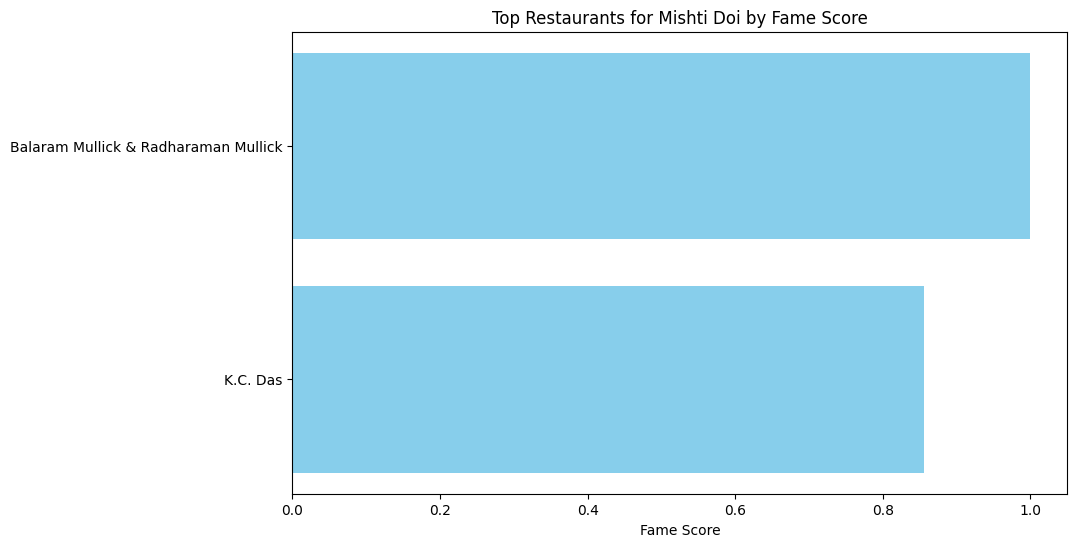

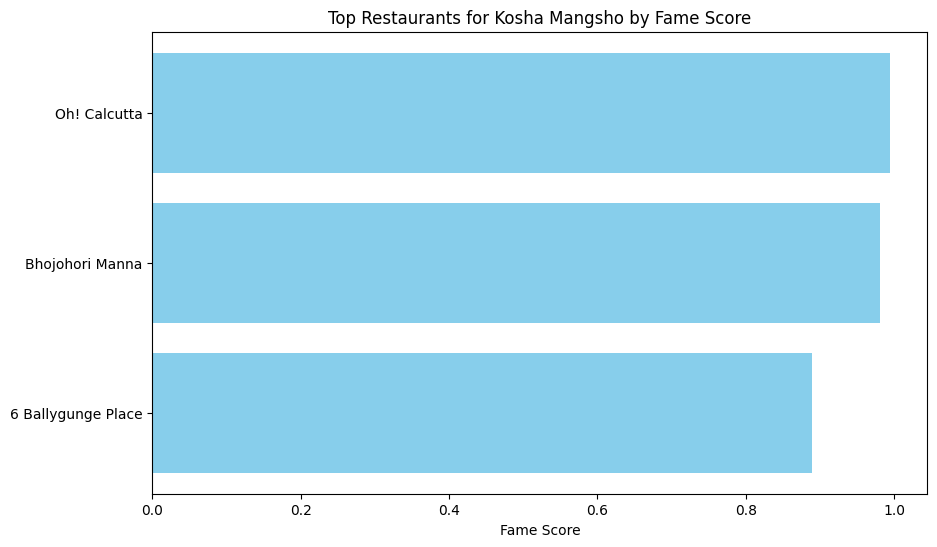

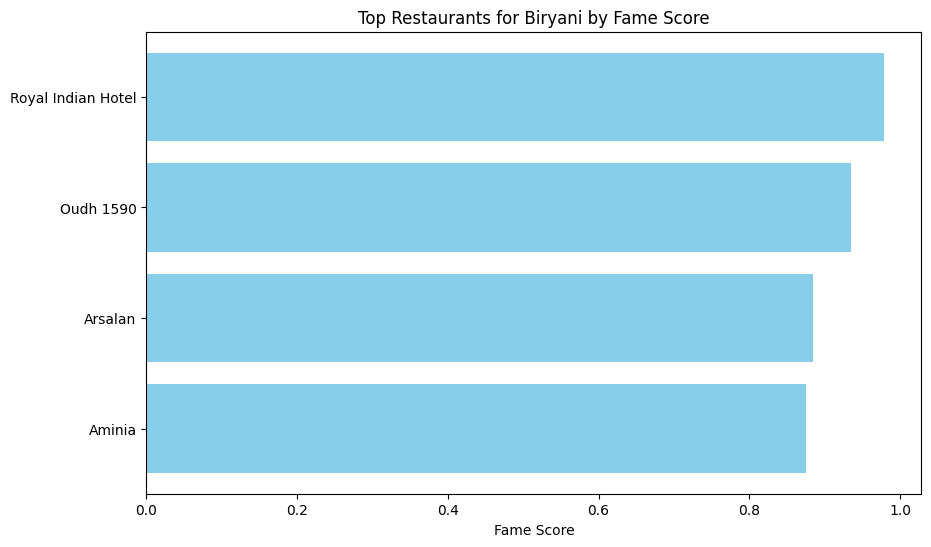

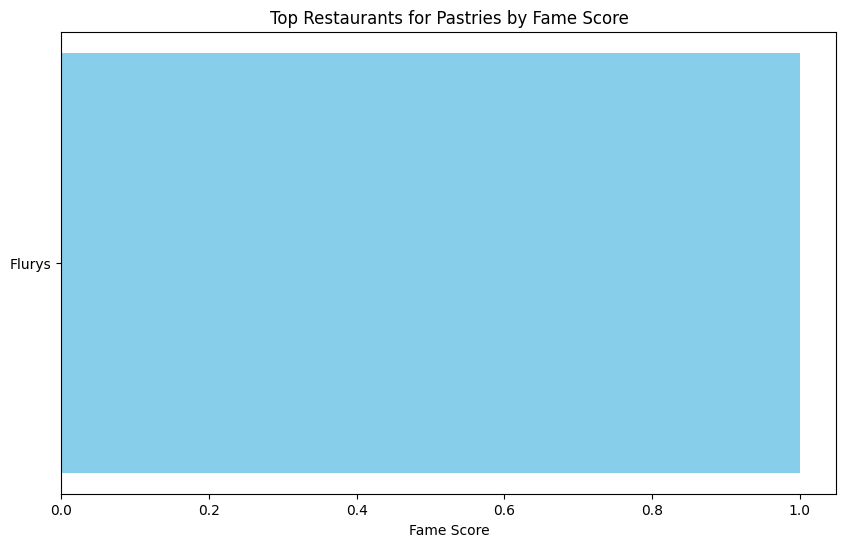

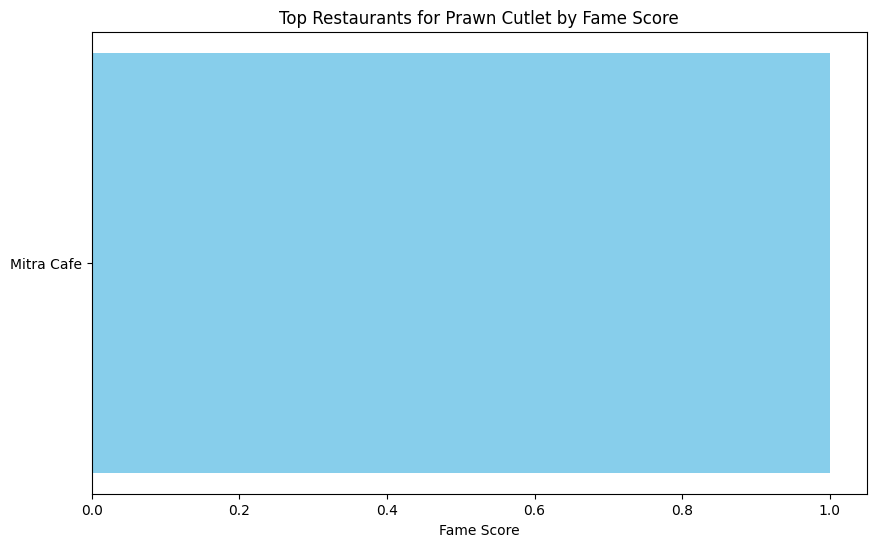

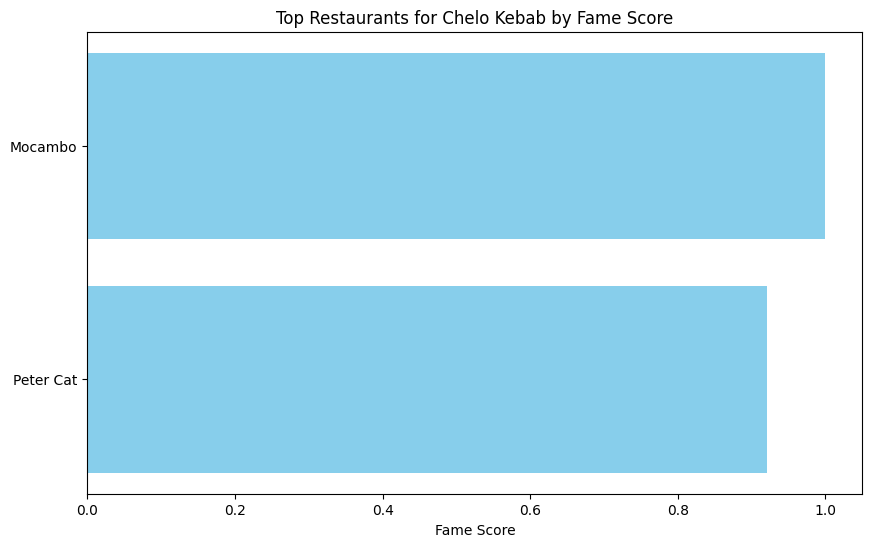

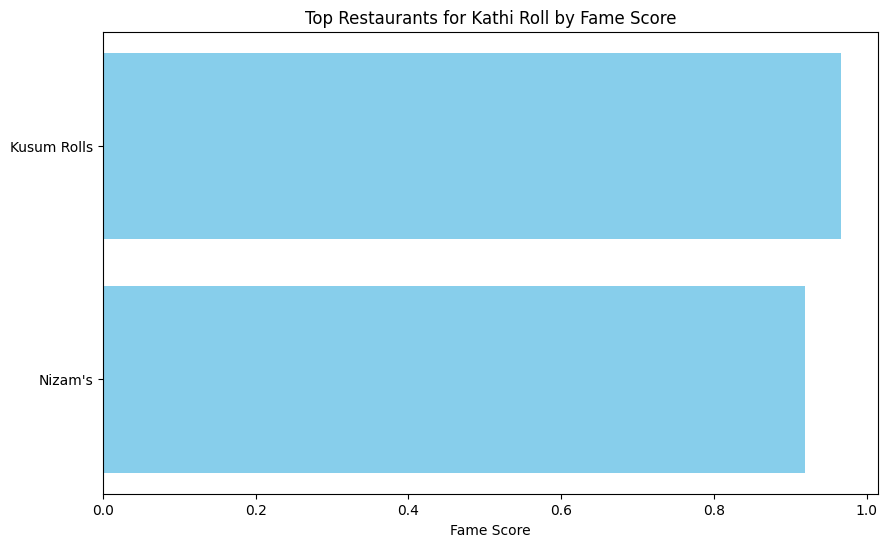

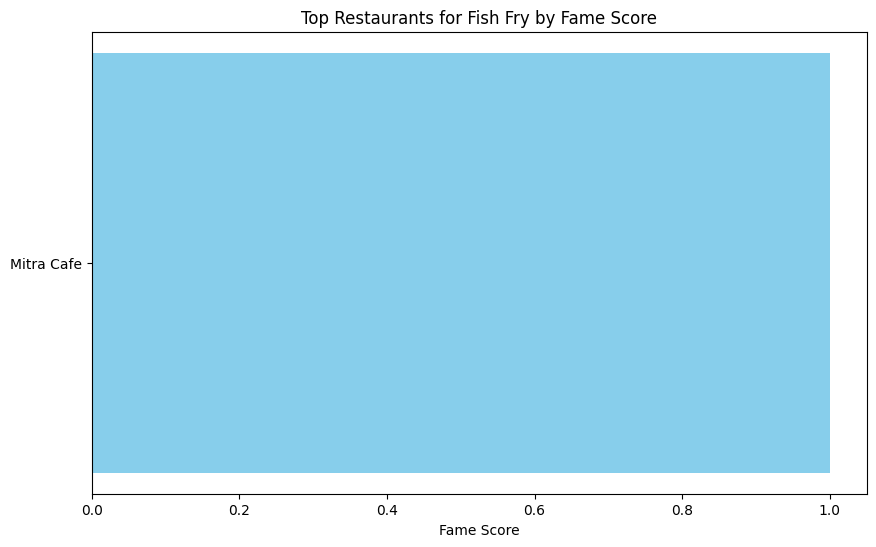

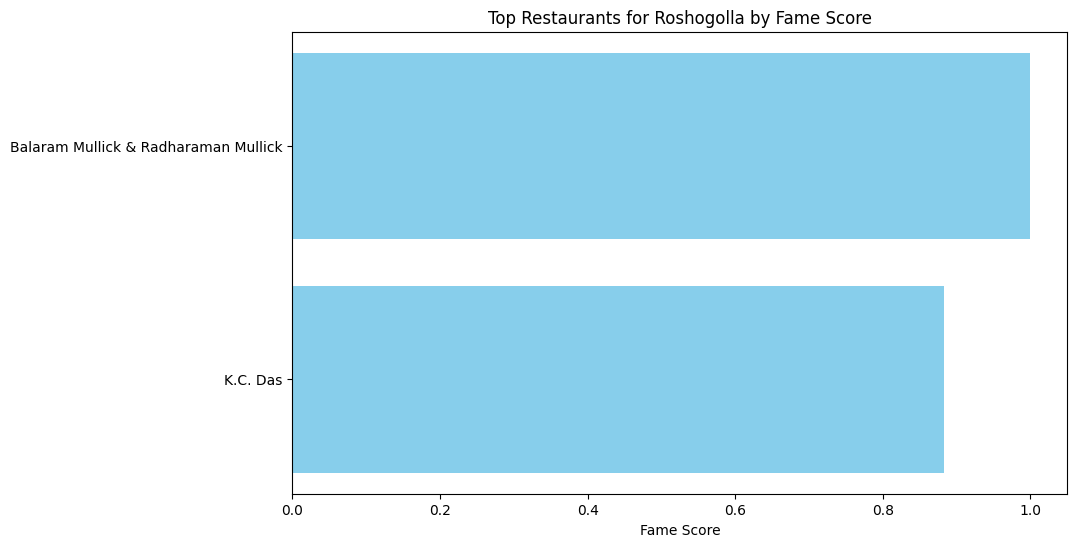

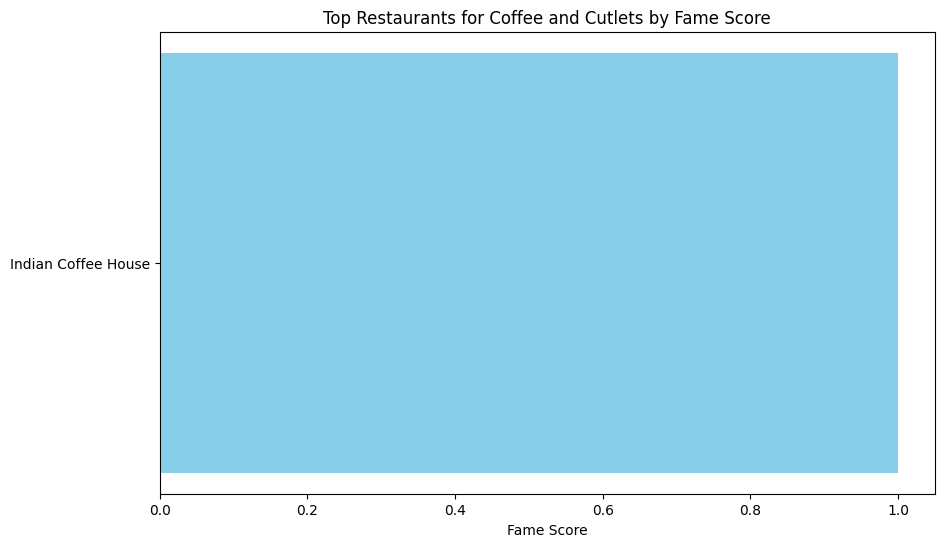

In [3]:
import matplotlib.pyplot as plt

def plot_famous_restaurants(df, dish_query):
    """
    Generates a bar chart of fame scores for a given dish.
    
    Args:
        df (pd.DataFrame): The restaurant dataset.
        dish_query (str): The dish to search for.
    """
    # Get the ranked list of restaurants
    ranked_restaurants = predict_famous_restaurants(df, dish_query)
    
    if not ranked_restaurants:
        print(f"No data to plot for '{dish_query}'.")
        return

    restaurants = [item[0] for item in ranked_restaurants]
    scores = [item[1] for item in ranked_restaurants]

    plt.figure(figsize=(10, 6))
    plt.barh(restaurants, scores, color='skyblue')
    plt.xlabel('Fame Score')
    plt.title(f'Top Restaurants for {dish_query} by Fame Score')
    plt.gca().invert_yaxis()  # Invert axis to have the highest score on top
    plt.show()

# Generate and plot charts for all unique dishes
unique_dishes = kolkata_data['dish'].unique()
print("\n" + "="*50)
print("GENERATING VISUALIZATIONS FOR EACH DISH...")
print("="*50)

for dish in unique_dishes:
    plot_famous_restaurants(kolkata_data, dish)


In [4]:
#adding months to generate data of food according to the time they are in swing for their max sales

In [5]:
import pandas as pd
import random
from collections import defaultdict

def create_kolkata_zomato_data():
    """
    Generates a synthetic dataset of restaurants in Kolkata.

    The data is based on popular and authentic dishes and restaurants
    that are well-known in the city. The ratings and review counts
    are randomized to simulate real-world variability.
    """
    restaurants = [
        "Arsalan", "Royal Indian Hotel", "Oudh 1590", "Aminia", "Nizam's",
        "Kusum Rolls", "Peter Cat", "Mocambo", "6 Ballygunge Place",
        "Bhojohori Manna", "Mitra Cafe", "Flurys", "Indian Coffee House",
        "K.C. Das", "Balaram Mullick & Radharaman Mullick"
    ]

    dishes_mapping = {
        "Biryani": ["Arsalan", "Royal Indian Hotel", "Oudh 1590", "Aminia"],
        "Kathi Roll": ["Nizam's", "Kusum Rolls"],
        "Chelo Kebab": ["Peter Cat", "Mocambo"],
        "Kosha Mangsho": ["6 Ballygunge Place", "Bhojohori Manna", "Oh! Calcutta"],
        "Prawn Cutlet": ["Mitra Cafe"],
        "Fish Fry": ["Mitra Cafe"],
        "Roshogolla": ["K.C. Das", "Balaram Mullick & Radharaman Mullick"],
        "Mishti Doi": ["K.C. Das", "Balaram Mullick & Radharaman Mullick"],
        "Pastries": ["Flurys"],
        "Coffee and Cutlets": ["Indian Coffee House"]
    }
    
    # Define a simplified seasonality for certain dishes
    seasonality = {
        "Roshogolla": [10, 11, 12], # Peak festival season
        "Mishti Doi": [4, 5, 6],    # Summer months
        "Kosha Mangsho": [1, 2, 12] # Winter months
    }

    data = []
    dish_list = list(dishes_mapping.keys())

    for _ in range(500):  # Generate a larger dataset for better seasonality
        dish = random.choice(dish_list)
        restaurant_name = random.choice(dishes_mapping.get(dish, restaurants))
        
        # Introduce seasonality by biasing month selection for certain dishes
        if dish in seasonality:
            month = random.choice(seasonality[dish] + [random.randint(1, 12)])
        else:
            month = random.randint(1, 12)

        rating = round(random.uniform(3.5, 5.0), 1)
        reviews = random.randint(100, 5000)
        
        data.append({
            'restaurant_name': restaurant_name,
            'dish': dish,
            'rating': rating,
            'number_of_reviews': reviews,
            'month': month
        })
    
    return pd.DataFrame(data)

# Generate the DataFrame
kolkata_data = create_kolkata_zomato_data()

# Display the first 5 rows to see the structure of the data
kolkata_data.head()

,restaurant_name,dish,rating,number_of_reviews,month
0,Mitra Cafe,Prawn Cutlet,3.6,4208,6
1,Bhojohori Manna,Kosha Mangsho,4.5,1756,2
2,Balaram Mullick & Radharaman Mullick,Mishti Doi,3.8,4923,5
3,Balaram Mullick & Radharaman Mullick,Roshogolla,4.5,244,12
4,Kusum Rolls,Kathi Roll,4.2,547,1


In [6]:
def predict_famous_dishes_by_month(df):
    """
    Predicts the most famous dish for each month based on total reviews.

    Args:
        df (pd.DataFrame): The restaurant dataset.
    
    Returns:
        dict: A dictionary mapping each month (1-12) to the most famous dish
              and its total reviews.
    """
    monthly_data = df.groupby(['month', 'dish']).agg(
        total_reviews=('number_of_reviews', 'sum')
    ).reset_index()

    famous_dishes_by_month = {}
    
    for month in sorted(monthly_data['month'].unique()):
        monthly_df = monthly_data[monthly_data['month'] == month]
        
        if not monthly_df.empty:
            most_famous_dish = monthly_df.loc[monthly_df['total_reviews'].idxmax()]
            famous_dishes_by_month[month] = {
                'dish': most_famous_dish['dish'],
                'reviews': most_famous_dish['total_reviews']
            }
            
    return famous_dishes_by_month

# Map month numbers to names for better readability
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Run the seasonality analysis
famous_dishes = predict_famous_dishes_by_month(kolkata_data)

# Print the results in a readable format
print("\n" + "="*50)
print("MOST FAMOUS DISH FOR EACH MONTH")
print("="*50)

for month, data in famous_dishes.items():
    print(f"| {month_names[month].ljust(10)} | {data['dish'].ljust(15)} | Reviews: {data['reviews']:<6} |")
    print("-" * 50)


MOST FAMOUS DISH FOR EACH MONTH
| January    | Kosha Mangsho   | Reviews: 27152  |
--------------------------------------------------
| February   | Kosha Mangsho   | Reviews: 46216  |
--------------------------------------------------
| March      | Pastries        | Reviews: 18431  |
--------------------------------------------------
| April      | Mishti Doi      | Reviews: 21379  |
--------------------------------------------------
| May        | Mishti Doi      | Reviews: 34464  |
--------------------------------------------------
| June       | Mishti Doi      | Reviews: 16932  |
--------------------------------------------------
| July       | Kathi Roll      | Reviews: 28311  |
--------------------------------------------------
| August     | Fish Fry        | Reviews: 14757  |
--------------------------------------------------
| September  | Kathi Roll      | Reviews: 15478  |
--------------------------------------------------
| October    | Roshogolla      | Reviews: 36730  